# Week5 - Lab

* Assign X, y
* Train-test split
* Visualize & speculate on training dataset
* Train a logistic regression model
* Evaluate the model, roc score
* Explain findings

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# https://www.kaggle.com/datasets/muhammadtalharasool/simple-gender-classification?select=gender.csv
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/gender.csv').iloc[:,:-1]
df.columns = df.columns.str.strip()
df.Gender = df.Gender.str.strip()
df.Occupation = df.Occupation.str.strip()
df['Marital Status'] = df['Marital Status'].str.strip()
df['Education Level'] = df['Education Level'].str.strip()
df['Favorite Color'] = df['Favorite Color'].str.strip()

<AxesSubplot:>

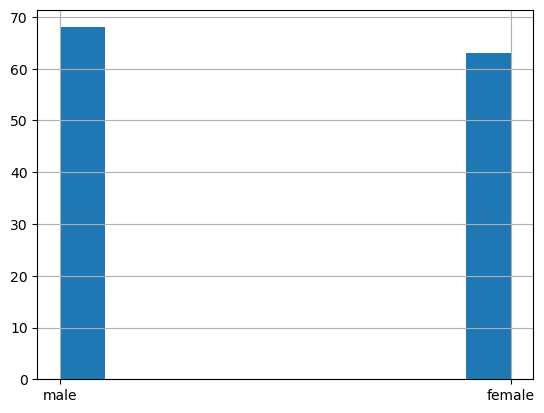

In [2]:
df.Gender.hist()

In [3]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


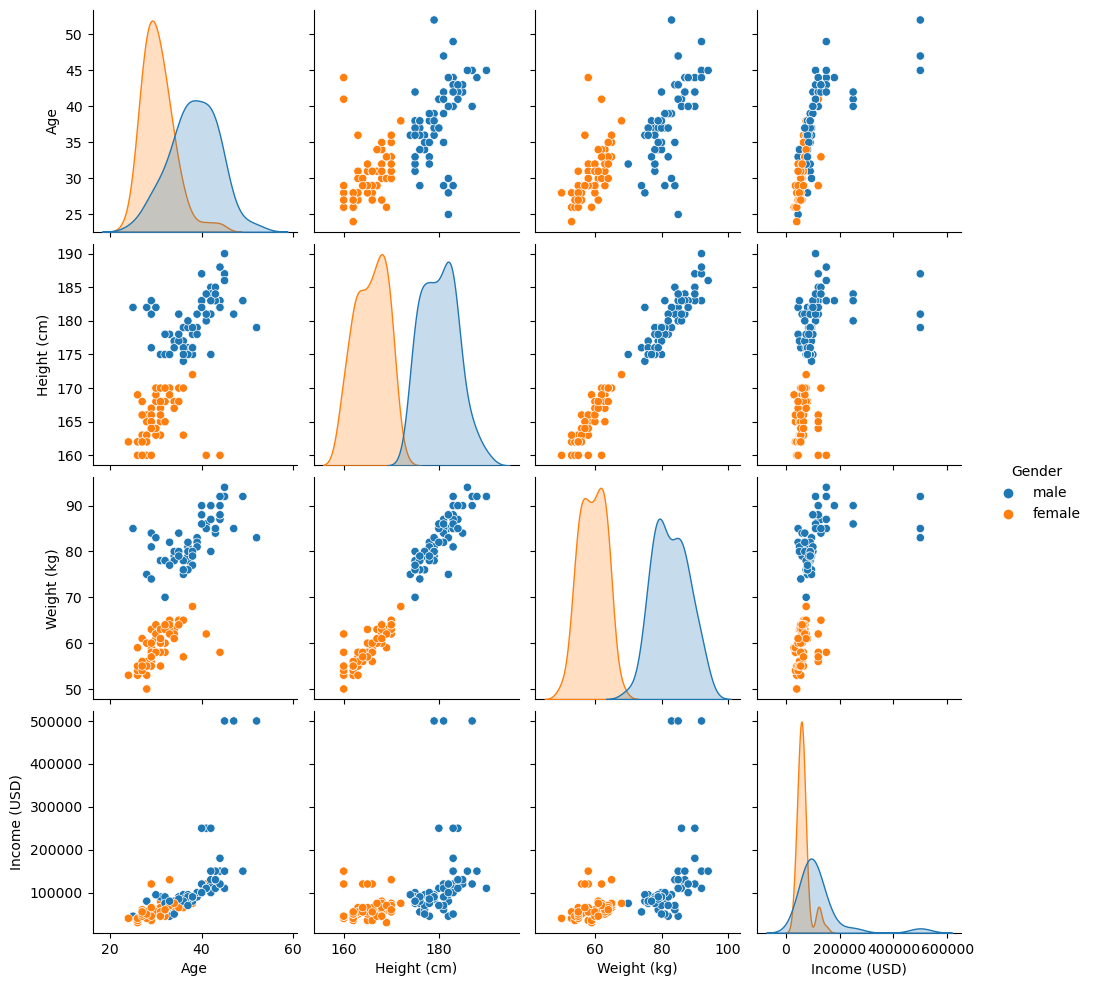

In [4]:
 sns.pairplot(df, hue='Gender')

In [5]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f'Unique values in column {col}: {unique_vals}')

Unique values in column Gender: ['male' 'female']
Unique values in column Age: [32 25 41 38 29 45 27 52 31 36 24 44 28 33 37 26 40 47 35 42 49 30 39 34
 43]
Unique values in column Height (cm): [175 182 160 178 165 190 163 179 168 177 162 183 166 181 170 176 169 187
 172 180 167 185 188 174 164 186 184]
Unique values in column Weight (kg): [70 85 62 79 58 92 55 83 61 76 53 87 60 84 65 78 59 75 82 74 63 90 56 80
 68 57 81 50 54 86 77 88 94 64]
Unique values in column Occupation: ['Software Engineer' 'Sales Representative' 'Doctor' 'Lawyer'
 'Graphic Designer' 'Business Consultant' 'Marketing Specialist' 'CEO'
 'Project Manager' 'Engineer' 'Accountant' 'Architect' 'Nurse' 'Analyst'
 'Teacher' 'IT Manager' 'Writer' 'Business Analyst' 'Software Developer']
Unique values in column Education Level: ["Master's Degree" "Bachelor's Degree" 'Doctorate Degree'
 "Associate's Degree"]
Unique values in column Marital Status: ['Married' 'Single' 'Divorced' 'Widowed']
Unique values in column Income (U

In [6]:
df.columns

Index(['Gender', 'Age', 'Height (cm)', 'Weight (kg)', 'Occupation',
       'Education Level', 'Marital Status', 'Income (USD)', 'Favorite Color'],
      dtype='object')

In [7]:
numerical_features = []
categorical_features = []
for i in df:
    if i in ['Occupation','Education Level','Marital Status','Favorite Color']:
        categorical_features.append(i)
    else:
        numerical_features.append(i)
numerical_features.remove('Gender')
numerical_features

['Age', 'Height (cm)', 'Weight (kg)', 'Income (USD)']

In [8]:
categorical_features

['Occupation', 'Education Level', 'Marital Status', 'Favorite Color']

### Assign X, y

In [9]:
X = df.drop('Gender', axis=1)
y = df['Gender']

### Train-test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Visualize and speculate on training dataset

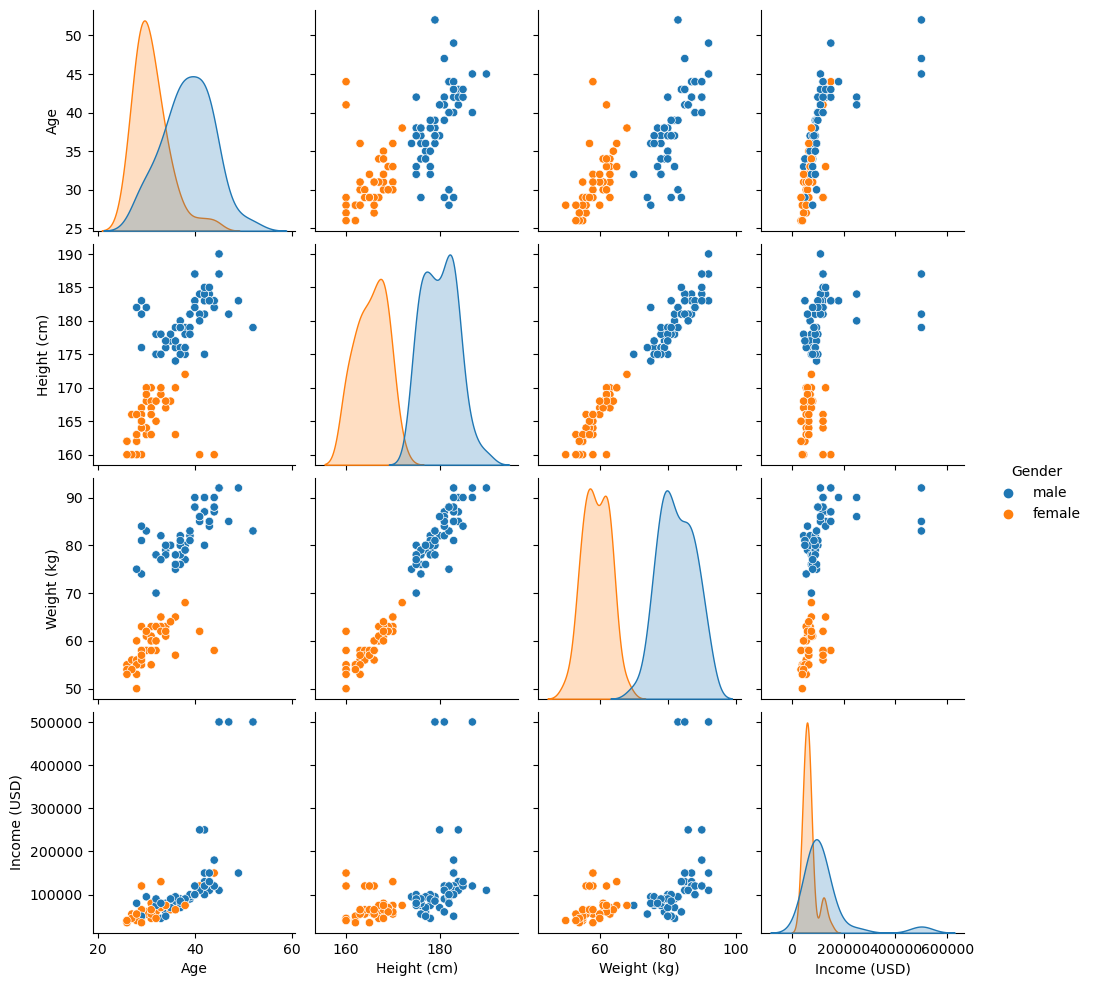

In [11]:
sns.pairplot(X_train.join(y_train), hue='Gender')

### Train a logistic regression model

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])


In [13]:
cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

In [14]:
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_features),
                                                      ('create_dummies', cat_pipeline, categorical_features)])
print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['Age', 'Height (cm)', 'Weight (kg)',
                                  'Income (USD)']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Occupation', 'Education Level',
        

In [15]:
X_train_processed = processing_pipeline.fit_transform(X_train)

# check the shape of the processed dataset
print(X_train_processed.shape)

(104, 36)


In [16]:
from sklearn.linear_model import LogisticRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), ('lm', LogisticRegression(penalty='l2'))])
modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height (cm)',
                                                   'Weight (kg)',
                                                   'Income (USD)']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                              

In [17]:
y_train_prob = modeling_pipeline.predict_proba(X_train)[:, 1]
y_test_prob = modeling_pipeline.predict_proba(X_test)[:, 1]


###  Evaluate the model, roc score

In [20]:
train_roc_score = roc_auc_score(y_train, y_train_prob)
test_roc_score = roc_auc_score(y_test, y_test_prob)


In [21]:
train_roc_score = roc_auc_score(y_train, y_train_prob)
test_roc_score = roc_auc_score(y_test, y_test_prob)

print("Training ROC score:", train_roc_score)
print("Test ROC score:", test_roc_score)

Training ROC score: 1.0
Test ROC score: 1.0


### Explain Findings

* The logistic regression model appears to have a perfect ability to distinguish between male and female names in the data, according to the ROC scores of 1.0 for both the training and test sets. This indicates that the model can confidently and accurately predict the gender of a name. This level of performance on the test set could also be a sign of overfitting, in which case the model has learned the training data too thoroughly and is unable to generalize to novel, untried data. To make sure that the model is not overfitting to the test set, it may be helpful to assess its performance on a different validation set.